In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
#"""讀資料夾
import os
from os import listdir
from os.path import isfile, join

import cv2

label_folder = []
total_size = 0
data_path = r"C:\Users\user\Desktop\master\NN\homeone\mnist_testData\Training data"
output = ""

for root, dirts, files in os.walk(data_path):
    for dirt in dirts:
        label_folder.append(dirt)
    total_size += len(files)
    
base_X_test = []
base_Y_test = []

test_path = r"C:\Users\user\Desktop\master\NN\homeone\mnist_testData\Testing data1"
FileName = [f for f in listdir(test_path)if isfile(join(test_path,f))]
lenlen = len(FileName)

for j in range(len(FileName)):
    path = test_path+"\\"+FileName[j]
    test_img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    base_X_test.append(test_img)
    
    file = FileName[j].split('.')[0]
    base_Y_test.append(file)
    output = output+file+"\n"

print("found", total_size,"files.")
print("folder:",label_folder)
#print("found", np.array(base_X_test).shape,"test files.")
#print(base_Y_test)
#"""

found 20000 files.
folder: ['2', '4', '5', '6', '7']


In [125]:
#base_X_test

In [ ]:
#"""讀檔
import numpy as np

base_X_train = []
base_Y_train = []

for i in range(len(label_folder)):
    labelPath = data_path+"\\"+label_folder[i]
    
    FileName = [f for f in listdir(labelPath)if isfile(join(labelPath,f))]
    
    for j in range(len(FileName)):
        path = labelPath+"\\"+FileName[j]
        
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        
        base_X_train.append(img)
        base_Y_train.append(int (label_folder[i]))

base_X_train = np.reshape(base_X_train, (20000,784))
base_Y_train = np.reshape(base_Y_train, 20000)
base_X_test = np.reshape(base_X_test, (5000,784))

m , n = base_X_train.shape

print(np.array(base_X_train).shape)
print(np.array(base_Y_train).shape)
#print(base_X_test)
#"""

In [4]:
base_X_train = base_X_train.T
base_X_test = base_X_test.T

base_X_train = base_X_train / 255
base_X_test = base_X_test / 255

#m , n = base_X_train.shape

In [107]:
#print(np.array(base_X_test))

In [5]:
def init_params():
    W1 = np.random.rand(8, 784) - 0.5
    b1 = np.random.rand(8, 1) - 0.5
    W2 = np.random.rand(8, 8) - 0.5
    b2 = np.random.rand(8, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [14]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    final = np.sum(predictions == Y) / Y.size
    return final

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            arr = get_accuracy(predictions, Y)
            print(arr)
            it.append(i)            
            acc.append(arr)
    return W1, b1, W2, b2

In [15]:
it = []
acc = []
W1, b1, W2, b2 = gradient_descent(base_X_train, base_Y_train, 0.3, 500)

Iteration:  0
[4 5 2 ... 2 2 2] [2 2 2 ... 7 7 7]
0.1449
Iteration:  10
[4 5 2 ... 5 7 7] [2 2 2 ... 7 7 7]
0.5742
Iteration:  20
[2 2 2 ... 4 7 7] [2 2 2 ... 7 7 7]
0.60395
Iteration:  30
[2 5 2 ... 5 7 7] [2 2 2 ... 7 7 7]
0.80295
Iteration:  40
[2 5 2 ... 7 7 7] [2 2 2 ... 7 7 7]
0.8421
Iteration:  50
[2 2 2 ... 7 7 7] [2 2 2 ... 7 7 7]
0.87765
Iteration:  60
[2 2 2 ... 7 7 7] [2 2 2 ... 7 7 7]
0.89275
Iteration:  70
[2 2 2 ... 7 7 7] [2 2 2 ... 7 7 7]
0.90315
Iteration:  80
[2 2 2 ... 7 7 7] [2 2 2 ... 7 7 7]
0.9109
Iteration:  90
[2 2 2 ... 7 7 7] [2 2 2 ... 7 7 7]
0.9164
Iteration:  100
[2 2 2 ... 7 7 7] [2 2 2 ... 7 7 7]
0.9207
Iteration:  110
[2 2 2 ... 7 7 7] [2 2 2 ... 7 7 7]
0.924
Iteration:  120
[2 2 2 ... 7 7 7] [2 2 2 ... 7 7 7]
0.9271
Iteration:  130
[2 2 2 ... 7 7 7] [2 2 2 ... 7 7 7]
0.9291
Iteration:  140
[2 2 2 ... 7 7 7] [2 2 2 ... 7 7 7]
0.9316
Iteration:  150
[2 2 2 ... 7 7 7] [2 2 2 ... 7 7 7]
0.9329
Iteration:  160
[2 2 2 ... 7 7 7] [2 2 2 ... 7 7 7]
0.93375
Ite

In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = base_X_train[:, index, None]
    prediction = make_predictions(base_X_train[:, index, None], W1, b1, W2, b2)
    
    label = base_Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
       
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    
def test_output(index, W1, b1, W2, b2):
    current_image = base_X_test[:, index, None]
    prediction = make_predictions(base_X_test[:, index, None], W1, b1, W2, b2)
    label = base_Y_test[index]
    return prediction[0]

In [134]:
final = []

f = open(r"C:\Users\user\Desktop\master\NN\homework\mnist_testData\711183115.txt","x")

for j in range(lenlen):
    #test_prediction(j, W1, b1, W2, b2)
    final.append(test_output(j, W1, b1, W2, b2))
    print(base_Y_test[j],end=" ",file=f)
    print(final[j],file=f)
    

#f = open(r"C:\Users\user\Desktop\master\NN\homework\mnist_testData\711183115.txt","x")
#f.write(final)
f.close()

Prediction:  [2]
Label:  2


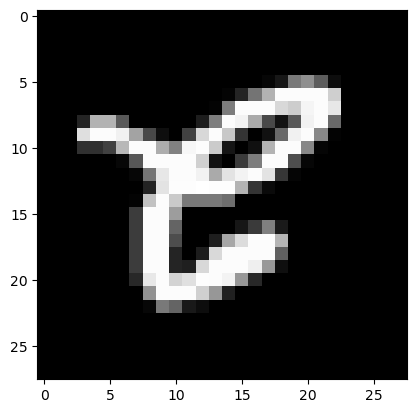

In [122]:
test_prediction(0,W1,b1,W2,b2)

In [133]:
"""
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
"""
f.close()

In [21]:
dev_predictions = make_predictions(base_X_train, W1, b1, W2, b2)
final = get_accuracy(dev_predictions, base_Y_train)
final

[2 2 2 ... 7 7 7] [2 2 2 ... 7 7 7]


0.95395

accuracy: 0.95395


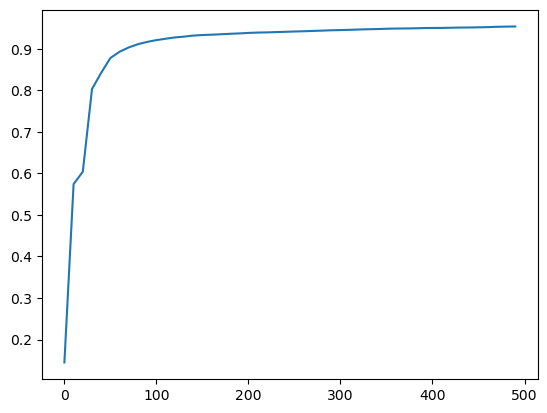

In [25]:
x = np.array(it)
y = np.array(acc)
print("accuracy:", final)
plt.plot(x,y)
plt.show()